In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
%matplotlib inline 

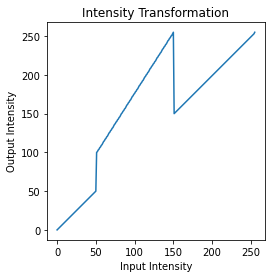

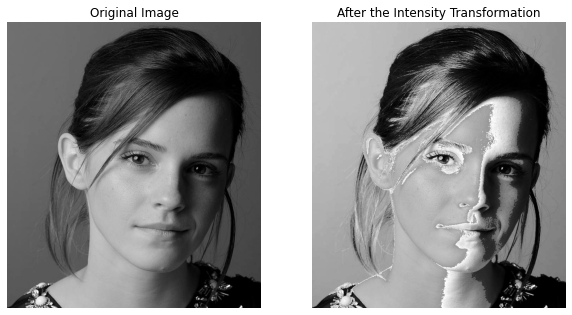

In [7]:
Img1 = cv.imread(r"emma_gray.jpg", cv.IMREAD_GRAYSCALE)
assert Img1 is not None

inp1 = np.linspace(0,50,51)
inp2 = np.linspace(100,255,100)
inp3 = np.linspace(150,255,105)

Out_int = np.concatenate((inp1,inp2,inp3),axis=0).astype(np.uint8)
fig1, ax1 = plt.subplots()
ax1.plot(Out_int)
ax1.title.set_text("Intensity Transformation")
ax1.set_xlabel('Input Intensity')
ax1.set_ylabel('Output Intensity')
ax1.set_aspect('equal')
assert len(Out_int) == 256

Out_Img1 = cv.LUT(Img1, Out_int)

fig, ax = plt.subplots(1, 2, figsize=(10,10))
ax[0].axis('off')
ax[0].title.set_text("Original Image")
ax[0].imshow(Img1 , cmap='gray')
ax[1].axis('off')
ax[1].title.set_text("After the Intensity Transformation")
ax[1].imshow(Out_Img1 , cmap='gray')

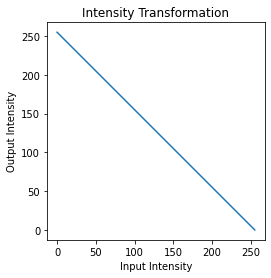

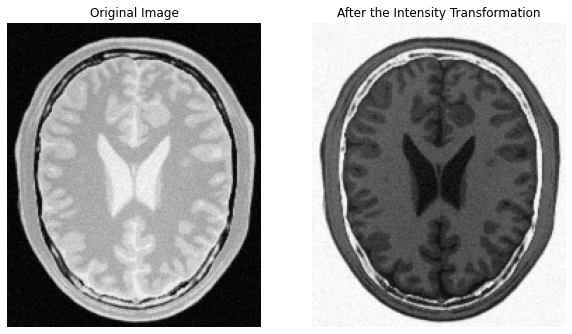

In [3]:
Img2 = cv.imread(r"brain_proton_density_slice.png", cv.IMREAD_GRAYSCALE)
assert Img2 is not None

inp1 = np.linspace(255,0,256)

Out_int = inp1.astype(np.uint8)
fig1, ax1 = plt.subplots()
ax1.plot(Out_int)
ax1.title.set_text("Intensity Transformation")
ax1.set_xlabel('Input Intensity')
ax1.set_ylabel('Output Intensity')
ax1.set_aspect('equal')
assert len(Out_int) == 256

Out_Img2 = cv.LUT(Img2, Out_int)

fig, ax = plt.subplots(1, 2, figsize=(10,10))
ax[0].axis('off')
ax[0].title.set_text("Original Image")
ax[0].imshow(Img2 , cmap='gray')
ax[1].axis('off')
ax[1].title.set_text("After the Intensity Transformation")
ax[1].imshow(Out_Img2 , cmap='gray')

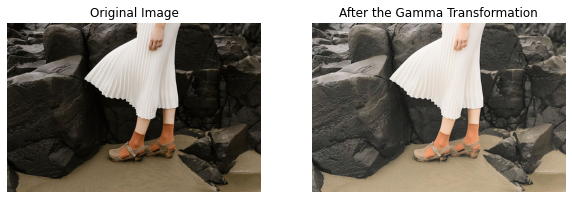

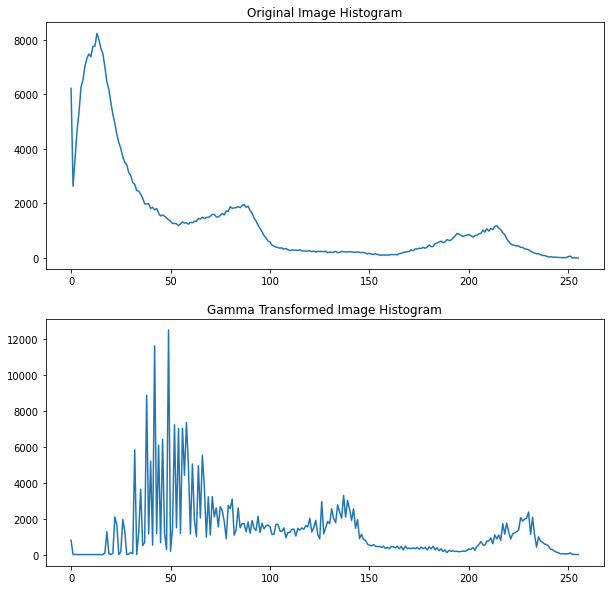

In [31]:
Img3 = cv.imread(r"highlights_and_shadows.jpg")
assert Img3 is not None

gamma = 0.5
Lab_Img3 = cv.cvtColor(Img3, cv.COLOR_BGR2Lab)
L,a,b=cv.split(Lab_Img3)

Gamma_Trans = np.array([(p/255)**gamma*255 for p in range(0,256)]).astype(np.uint8)
L_trans =  cv.LUT(L,Gamma_Trans)
Lab_Img3[:,:,0] = L_trans

Out_Img3 = cv.cvtColor(Lab_Img3, cv.COLOR_Lab2BGR).astype("uint8")

RGB_Img3 = cv.cvtColor(Img3, cv.COLOR_BGR2RGB).astype("uint8")
RGB_Out_Img3 = cv.cvtColor(Out_Img3, cv.COLOR_BGR2RGB).astype("uint8")

#Gamma Correction
fig, ax = plt.subplots(1, 2, figsize=(10,10))
ax[0].axis('off')
ax[0].title.set_text("Original Image")
ax[0].imshow(RGB_Img3)
ax[1].axis('off')
ax[1].title.set_text("After the Gamma Transformation")
ax[1].imshow(RGB_Out_Img3)

#Histograms of the images
hist_Input = cv.calcHist([Img3], [0], None, [256], [0,256])
hist_Output = cv.calcHist([Out_Img3], [0], None, [256], [0,256])

fig, ax = plt.subplots(2,1, figsize=(10,10))
ax[0].title.set_text("Original Image Histogram")
ax[0].plot(hist_Input )
ax[1].title.set_text("Gamma Transformed Image Histogram")
ax[1].plot(hist_Output )

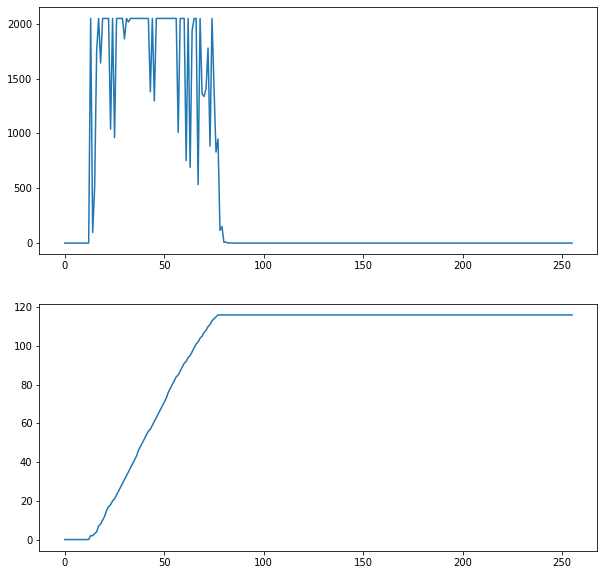

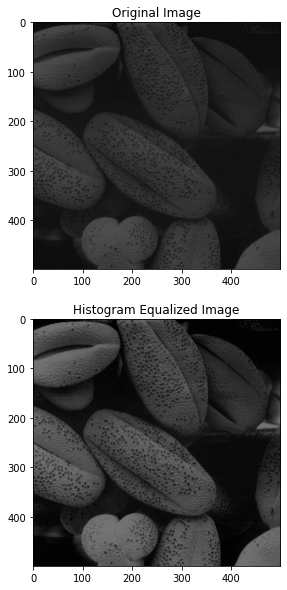

In [8]:
#Ques 4 
import numpy as np
import cv2

path = "shells.png"
img = cv2.imread(path, cv.IMREAD_GRAYSCALE)
img2 = cv2.imread(path, cv.IMREAD_GRAYSCALE)
img2 = cv.cvtColor(img2, cv.COLOR_BGR2RGB).astype("uint8")
a = np.zeros((256,),dtype=np.float16)

height,width=img.shape

#finding histogram
for i in range(width):
    for j in range(height):
        g = img[j,i]
        a[g] = a[g]+1  
        
#performing histogram equalization
tmp = 1.0/(height*width)
b = np.zeros((256,),dtype=np.float16)

for i in range(256):
    for j in range(i+1):
        b[i] += a[j] * tmp;
    b[i] = round(b[i] * 255);

# b now contains the equalized histogram
b=b.astype(np.uint8)

#Re-map values from equalized histogram into the image
for i in range(width):
    for j in range(height):
        g = img[j,i]
        img[j,i]= b[g]
fig, ax = plt.subplots(2,1, figsize=(10,10))
ax[0].plot(a)
ax[1].plot(b)
img = cv.cvtColor(img, cv.COLOR_BGR2RGB).astype("uint8")
fig, ax = plt.subplots(2,1, figsize=(10,10))
ax[0].title.set_text("Original Image")
ax[0].imshow(img2 )
ax[1].title.set_text("Histogram Equalized Image")
ax[1].imshow(img )

In [42]:
#Ques 5
Img = cv.imread(r"a1q5images/im01small.png", cv.IMREAD_GRAYSCALE)
assert Img is not None

scale = 2 # 0 < scale <= 10
NewImg = np.zeros((int(Img.shape[0]*scale),int(Img.shape[1]*scale))).astype(np.uint8)

for y in range(NewImg.shape[0]):
    for x in range(NewImg.shape[1]):
        samplex = x/scale
        sampley = y/scale
        dx = samplex - np.floor(samplex)
        dy = sampley - np.floor(sampley)

        val = Img[int(sampley-dy),int(samplex-dx)]*(1-dx)*(1-dy)
        val += Img[int(sampley + 1 - dy),int(samplex-dx)]*(1-dx)*(dy) 
        val += Img[int(sampley-dy),int(samplex + 1 - dx)]*(dx)*(1-dy)
        val += Img[int(sampley + 1 -dy),int(samplex + 1 - dx)]*(dx)*(dy)

        NewImg[y,x] = val.astype(np.uint8)

fig, ax = plt.subplots(2,2, sharex='all', figsize=(10,10))
ax[0,0].imshow(NewImg, cmap='gray', vmin=0, vmax=255)
ax[0,0].set_title('Original Image')
ax[0,0].set_xticks([]), ax[0,0].set_yticks([])

IndexError: index 480 is out of bounds for axis 1 with size 480

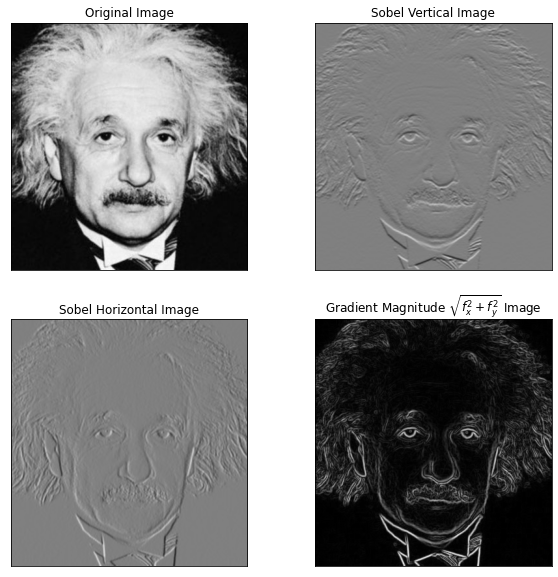

In [37]:
#Ques6 part1
Img5 = cv.imread(r"einstein.png", cv.IMREAD_GRAYSCALE).astype('float32')
assert Img5 is not None

# Vertical x axis
sobel_ver_kernal = np.array([(-1, -2, -1), (0, 0, 0), (1, 2, 1)], dtype='float32')
Img5_x = cv.filter2D(Img5, -1, sobel_ver_kernal)

# Horizontal y axis
sobel_hor_kernal = np.array([(-1, 0, 1), (-2, 0, 2), (-1, 0, 1)], dtype='float32')
Img5_y = cv.filter2D(Img5, -1, sobel_hor_kernal)

Grad_Img5 = np.sqrt(Img5_x**2 + Img5_y**2)

fig, ax = plt.subplots(2,2, sharex='all', figsize=(10,10))
ax[0,0].imshow(Img5, cmap='gray', vmin=0, vmax=255)
ax[0,0].set_title('Original Image')
ax[0,0].set_xticks([]), ax[0,0].set_yticks([])

ax[0,1].imshow(Img5_x, cmap='gray', vmin=-1020, vmax=1020)
ax[0,1].set_title('Sobel Vertical Image')
ax[0,1].set_xticks([]), ax[0,1].set_yticks([])

ax[1,0].imshow(Img5_y, cmap='gray', vmin=-1020, vmax=1020)
ax[1,0].set_title('Sobel Horizontal Image')
ax[1,0].set_xticks([]), ax[1,0].set_yticks([])

ax[1,1].imshow(Grad_Img5, cmap='gray')
ax[1,1].set_title('Gradient Magnitude $\sqrt{f_x^2 + f_y^2}$ Image')
ax[1,1].set_xticks([]), ax[1,1].set_yticks([])
plt.show()

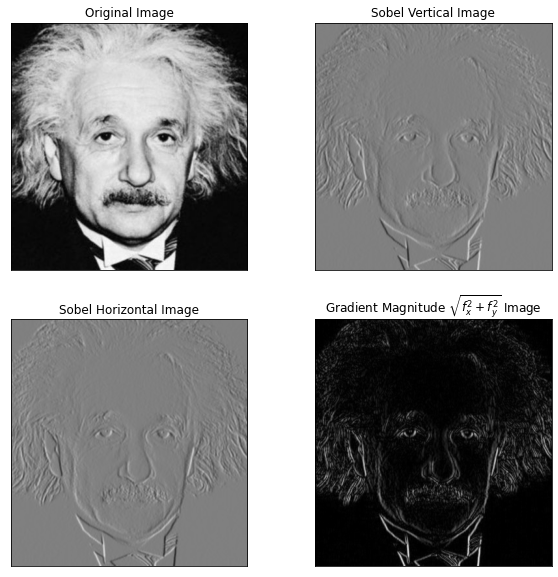

In [39]:
#Ques6 part2
from scipy import signal

Img5 = cv.imread(r"einstein.png", cv.IMREAD_GRAYSCALE).astype('float32')
assert Img5 is not None

# Vertical x axis
sobel_ver_kernal = np.array([(-1, -2, -1), (0, 0, 0), (1, 2, 1)], dtype='float32')
Img5_x = signal.convolve2d(Img5, sobel_ver_kernal, boundary='symm', mode='same')

# Horizontal y axis
sobel_hor_kernal = np.array([(-1, 0, 1), (-2, 0, 2), (-1, 0, 1)], dtype='float32')
Img5_x = signal.convolve2d(Img5, sobel_hor_kernal, boundary='symm', mode='same')

Grad_Img5 = np.sqrt(Img5_x**2 + Img5_y**2)

fig, ax = plt.subplots(2,2, sharex='all', figsize=(10,10))
ax[0,0].imshow(Img5, cmap='gray', vmin=0, vmax=255)
ax[0,0].set_title('Original Image')
ax[0,0].set_xticks([]), ax[0,0].set_yticks([])

ax[0,1].imshow(Img5_x, cmap='gray', vmin=-1020, vmax=1020)
ax[0,1].set_title('Sobel Vertical Image')
ax[0,1].set_xticks([]), ax[0,1].set_yticks([])

ax[1,0].imshow(Img5_y, cmap='gray', vmin=-1020, vmax=1020)
ax[1,0].set_title('Sobel Horizontal Image')
ax[1,0].set_xticks([]), ax[1,0].set_yticks([])

ax[1,1].imshow(Grad_Img5, cmap='gray')
ax[1,1].set_title('Gradient Magnitude $\sqrt{f_x^2 + f_y^2}$ Image')
ax[1,1].set_xticks([]), ax[1,1].set_yticks([])
plt.show()

In [41]:
#Ques6 part3
from scipy import signal

Img5 = cv.imread(r"einstein.png", cv.IMREAD_GRAYSCALE).astype('float32')
assert Img5 is not None

# Vertical x axis
sobel_ver_kernal_1 = np.array([(1), (2), (1)], dtype='float32')
sobel_ver_kernal_2 = np.array([1, 0, -1], dtype='float32')
Img5_x = signal.convolve(Img5, sobel_ver_kernal_1, boundary='symm', mode='same')
Img5_x = signal.convolve(Img5_x, sobel_ver_kernal_2, boundary='symm', mode='same')

# Horizontal y axis
sobel_hor_kernal = np.array([(-1, 0, 1), (-2, 0, 2), (-1, 0, 1)], dtype='float32')
Img5_x = signal.convolve2d(Img5, sobel_hor_kernal, boundary='symm', mode='same')

Grad_Img5 = np.sqrt(Img5_x**2 + Img5_y**2)

fig, ax = plt.subplots(2,2, sharex='all', figsize=(10,10))
ax[0,0].imshow(Img5, cmap='gray', vmin=0, vmax=255)
ax[0,0].set_title('Original Image')
ax[0,0].set_xticks([]), ax[0,0].set_yticks([])

ax[0,1].imshow(Img5_x, cmap='gray', vmin=-1020, vmax=1020)
ax[0,1].set_title('Sobel Vertical Image')
ax[0,1].set_xticks([]), ax[0,1].set_yticks([])

ax[1,0].imshow(Img5_y, cmap='gray', vmin=-1020, vmax=1020)
ax[1,0].set_title('Sobel Horizontal Image')
ax[1,0].set_xticks([]), ax[1,0].set_yticks([])

ax[1,1].imshow(Grad_Img5, cmap='gray')
ax[1,1].set_title('Gradient Magnitude $\sqrt{f_x^2 + f_y^2}$ Image')
ax[1,1].set_xticks([]), ax[1,1].set_yticks([])
plt.show()

TypeError: convolve() got an unexpected keyword argument 'boundary'

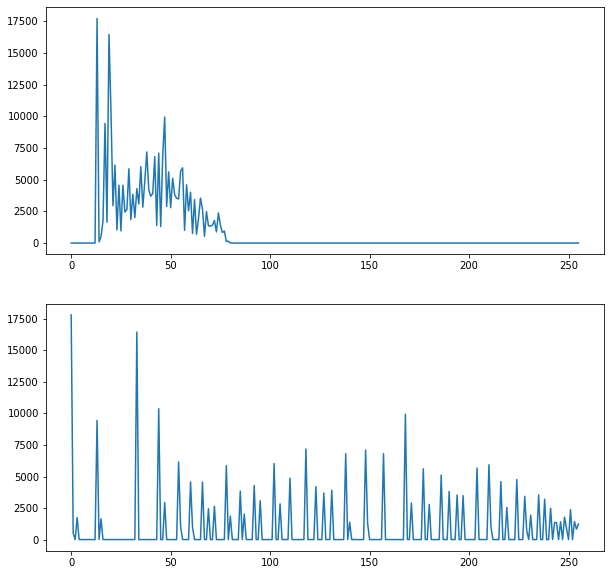

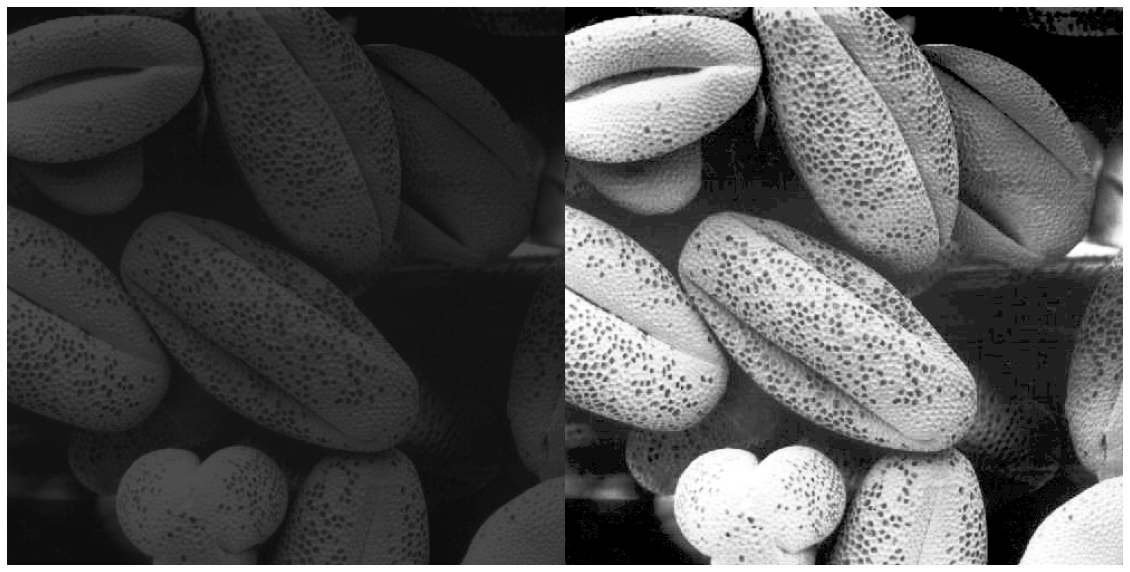

In [3]:
f = cv.imread(r'shells.png', cv . IMREAD_GRAYSCALE)
assert f is not None


hist_f = cv.calcHist([f], [0], None, [256], [0,256])
g = cv.equalizeHist(f)
hist_g = cv.calcHist([g], [0], None, [256], [0,256])

fig, ax = plt.subplots(2,1, figsize=(10,10))
ax[0].plot(hist_f)
ax[1].plot(hist_g)

fig, ax = plt.subplots(figsize=(20,20))
combined_images = np.hstack((f, g))
plt.axis('off')
plt.imshow(combined_images , cmap='gray')